In [1]:
import scipy as sp
import numpy as np
import qibo
from qibo.symbols import *
from qibo import hamiltonians
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.stats import unitary_group

from functions import *

In [2]:
def sOpt(H, state):
    V = variance(H, state)
    s = 1/V
    return s

def sOpt2(H, state):
    V = variance(H, state)
    E = state.conj().T @ H @ state
    s = 1/(E+2*V)
    return s

def energyDiff(state, H , t):
    val1 = 2*np.real((np.exp(1j*t)-1) * (state.conj().T @ sp.linalg.expm(-1j*t*H) @ state) * (state.conj().T @ sp.linalg.expm(1j*t*H) @ H @ state ))
    val2 = 2*(1-np.cos(t))*np.abs(state.conj().T@ sp.linalg.expm(-1j*t*H)@ state)**2 * np.real(state.conj().T @ H @ state) 
    return val1, val2



In [3]:
def randomHamiltonian(nqubits, alpha = 1):
    A = np.random.choice([-1, 1], size=(2**nqubits, 2**nqubits)) + 1j*np.random.choice([-1, 1], size=(2**nqubits, 2**nqubits))
    #A = np.random.rand(2**nqubits, 2**nqubits) + 1j*np.random.rand(2**nqubits, 2**nqubits)
    A = A + A.conj().T
    A /= np.linalg.norm(A)
    A = alpha*A
    return A

def randomHamiltonian2(nqubits, eigenvalues, alpha = 1):
    H = np.zeros((2**nqubits, 2**nqubits))
    for i in range(2**nqubits):
        H[i,i] = eigenvalues[i]
    U = unitary_group.rvs(2**nqubits)
    H = U @ H @ U.conj().T
    H *= alpha/np.linalg.norm(H)
    return H

In [19]:
np.random.seed(0)
nqubits = 6
factor = np.logspace(-1, 2 , 50)
absResult = np.empty(len(factor))
relResult = np.empty(len(factor))
t = np.linspace(0, (2*np.pi)**2, 100)
repeats = 10

for i in tqdm(range(len(factor))):
    absDiff = np.zeros(repeats)
    relDiff = np.zeros(repeats)
    for k in range(repeats):
        H = randomHamiltonian(nqubits, factor[i])
        initState = np.random.rand(2**nqubits) + 1j*np.random.rand(2**nqubits)
        initState = initState/np.linalg.norm(initState)
        statePi = DBQITE(1, H, (np.pi)**2, initState)[-1,:]
        energyPi = statePi.conj().T @ H @ statePi
        energyDBQITE = np.zeros(len(t))
        for j in range(len(t)):
            stateDBQITE = DBQITE(1, H, t[j], initState)[-1,:]
            energyDBQITE[j] = np.real(stateDBQITE.conj().T @ H @ stateDBQITE)
        energyMin = np.min(energyDBQITE)
        absDiff[k] += np.abs(energyMin-energyPi)
        if  np.abs(energyMin-energyPi)/np.abs(energyMin) > 20:
            relDiff[k] += 0
        else:
            relDiff[k] += np.abs(energyMin-energyPi)/np.abs(energyMin)
    absResult[i] = np.sum(absDiff)/repeats
    relResult[i] = np.sum(relDiff)/repeats

plt.figure()
plt.plot(factor, absResult)
plt.xlabel(r'$||H||$')
plt.ylabel('Absolute energy difference')
plt.show()

plt.figure()
plt.plot(factor, absResult/factor)
plt.xlabel(r'$||H||$')
plt.ylabel('Absolute energy difference/||H||')
plt.show()

plt.figure()
plt.plot(factor, relResult)
plt.xlabel(r'$||H||$')
plt.ylabel('Relative energy difference')
plt.show()


 24%|██▍       | 12/50 [00:50<02:41,  4.24s/it]


KeyboardInterrupt: 

100%|██████████| 20/20 [34:44<00:00, 104.21s/it]


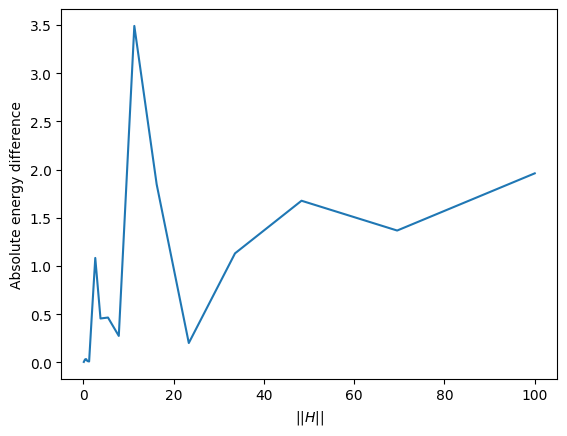

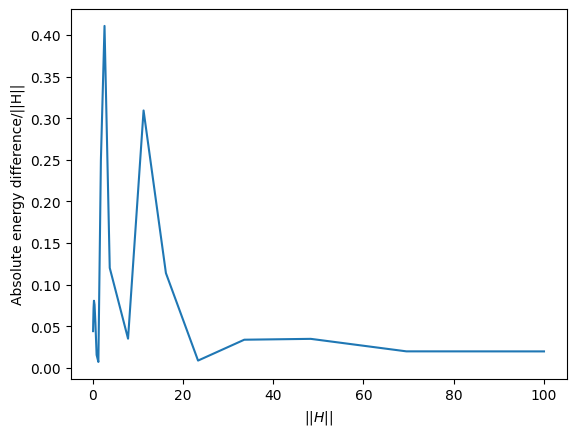

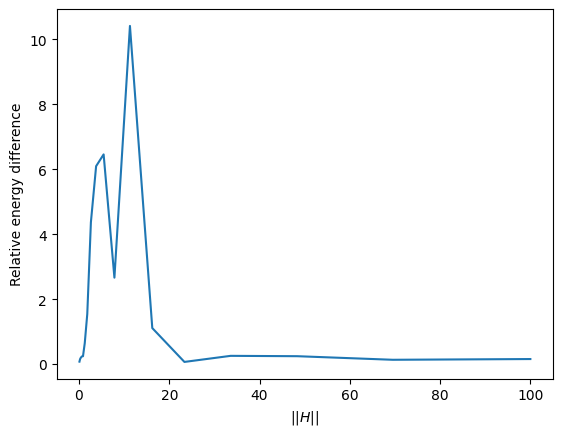

In [121]:
np.random.seed(0)
nqubits = 8
factor = np.logspace(-1, 2 , 20)
absResult = np.empty(len(factor))
relResult = np.empty(len(factor))
t = np.linspace(0, (2*np.pi)**2, 50)
repeats = 10

for i in tqdm(range(len(factor))):
    absDiff = np.zeros(repeats)
    relDiff = np.zeros(repeats)
    for k in range(repeats):
        H = randomHamiltonian(nqubits, factor[i])
        initState = np.random.rand(2**nqubits) + 1j*np.random.rand(2**nqubits)
        initState = initState/np.linalg.norm(initState)
        statePi = DBQITE(1, H, (np.pi)**2, initState)[-1,:]
        energyPi = statePi.conj().T @ H @ statePi
        energyDBQITE = np.zeros(len(t))
        for j in range(len(t)):
            stateDBQITE = DBQITE(1, H, t[j], initState)[-1,:]
            energyDBQITE[j] = np.real(stateDBQITE.conj().T @ H @ stateDBQITE)
        energyMin = np.min(energyDBQITE)
        absDiff[k] += np.abs(energyMin-energyPi)
        if  np.abs(energyMin-energyPi)/np.abs(energyMin) > 20:
            relDiff[k] += 0
        else:
            relDiff[k] += np.abs(energyMin-energyPi)/np.abs(energyMin)
    absResult[i] = np.sum(absDiff)/repeats
    relResult[i] = np.sum(relDiff)/repeats

plt.figure()
plt.plot(factor, absResult)
plt.xlabel(r'$||H||$')
plt.ylabel('Absolute energy difference')
plt.show()

plt.figure()
plt.plot(factor, absResult/factor)
plt.xlabel(r'$||H||$')
plt.ylabel('Absolute energy difference/||H||')
plt.show()

plt.figure()
plt.plot(factor, relResult)
plt.xlabel(r'$||H||$')
plt.ylabel('Relative energy difference')
plt.show()


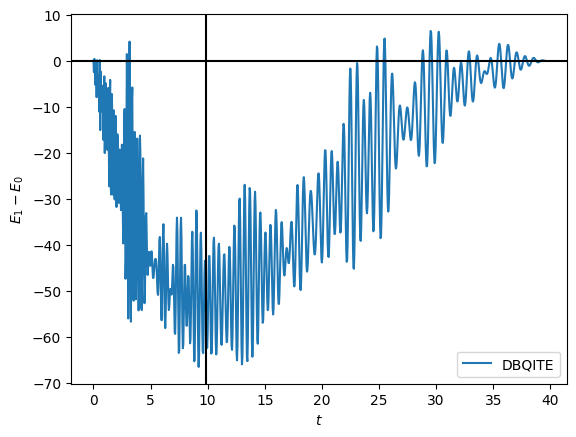

In [ ]:
nqubits = 4
H = randomHamiltonian(nqubits,alpha = 100)
stateInit = np.random.rand(2**nqubits) + 1j*np.random.rand(2**nqubits)
stateInit = stateInit/np.linalg.norm(stateInit)
t = np.linspace(0, (2*np.pi)**2, 1000)
energy0 = np.real(stateInit.conj().T @ H @ stateInit)
var = variance(H, stateInit)
energy = np.zeros(len(t))
energy2 = np.zeros(len(t))
val1 = np.zeros(len(t))
val2 = np.zeros(len(t))
energy_grad = np.zeros(len(t))
state = np.copy(stateInit)
for i in range(len(t)):
    state = DBQITE(1, H, t[i], stateInit)[-1,:]
    energy[i] = np.real(state.conj().T @ H @ state)-energy0
    #energy2[i] = energyDiff(stateInit, H, np.sqrt(t[i]))
    val1[i], val2[i] = energyDiff(stateInit, H, t[i])

energy_grad = np.gradient(energy)
plt.figure()
plt.plot(t, energy, label = 'DBQITE')
#plt.plot(t, -1*val1, label = 'Re')
#plt.plot(t, val2, label = 'cos')
#plt.plot(t, val1+val2)

# plt.axvline(x=s1, color='r')
# plt.axvline(x=s2, color='g')
plt.axhline(y = 0, color='k')
plt.axvline(x = np.pi**2, color='k')
plt.ylabel(r'$E_1-E_0$')
plt.xlabel(r'$t$')
plt.legend()
plt.show()



In [ ]:
def decomposeInEigenBasis(eigenvectors, state):
    n = len(eigenvectors)
    coeff = np.zeros(n, dtype = complex)
    for i in range(n):
        coeff[i] = state.conj().T @ eigenvectors[:,i]
    return coeff

In [8]:
def energyDiffEnergyBasis(coeffs, eigenvalues, energy, t):
    n = len(coeffs)
    #val = 0
    val1 = 0
    val2 = 0
    for i in range(n):
        for j in range(n):
            #val1 += np.abs(coeffs[i])**2 * np.abs(coeffs[j])**2 * np.cos((eigenvalues[i]+eigenvalues[j])*t)*(eigenvalues[i]-energy)
            #val2 += np.abs(coeffs[i])**2 * np.abs(coeffs[j])**2 * eigenvalues[i]*np.sin((eigenvalues[i]-eigenvalues[j])*t)
            delta = eigenvalues[i]-eigenvalues[j]
            val1 += np.abs(coeffs[i])**2 * np.abs(coeffs[j])**2 * eigenvalues[i] * (np.cos(t*(delta+1))-np.cos(t*delta))
            val2 += np.abs(coeffs[i])**2 * np.abs(coeffs[j])**2 * (np.cos(delta*t))# +1j*np.sin(delta*t))
            #val += np.abs(coeffs[i])**2 * np.abs(coeffs[j])**2 * (eigenvalues[i]*np.cos(delta*t+t)-(eigenvalues[i]+energy*(np.cos(t)-1))*np.cos(delta*t))
    
    return 2*val1+2*(1-np.cos(t))*np.real(val2)*energy#(2*np.cos(t)-1)*val1 - 2*np.sin(t)*val2
    #return (2*np.cos(t)-1)*val1 - 2*np.sin(t)*val2
    return 2*val

def energyDiffEnergyBasisEqual(coeffs, eigenvalues, energy, t):
    n = len(coeffs)
    val1 = 0
    val2 = 0
    for i in range(n):
        j = i
        #val1 += np.abs(coeffs[i])**2 * np.abs(coeffs[j])**2 * np.cos((eigenvalues[i]+eigenvalues[j])*t)*(eigenvalues[i]-energy)
        #val2 += np.abs(coeffs[i])**2 * np.abs(coeffs[j])**2 * eigenvalues[i]*np.sin((eigenvalues[i]-eigenvalues[j])*t)
        delta = eigenvalues[i]-eigenvalues[j]
        val1 += np.abs(coeffs[i])**2 * np.abs(coeffs[j])**2 * eigenvalues[i] * (np.cos(t*(delta+1))-np.cos(t*delta))
        val2 += np.abs(coeffs[i])**2 * np.abs(coeffs[j])**2 * (np.cos(delta*t))# +1j*np.sin(delta*t))
    
    return 2*val1+2*(1-np.cos(t))*np.real(val2)*energy#(2*np.cos(t)-1)*val1 - 2*np.sin(t)*val2


def energyDiffEnergyBasisUnequal(coeffs, eigenvalues, energy, t):
    n = len(coeffs)
    val1 = 0
    val2 = 0
    for i in range(n):
        for j in range(n):
            if i != j:
                delta = eigenvalues[i]-eigenvalues[j]
                val1 += np.abs(coeffs[i])**2 * np.abs(coeffs[j])**2 * eigenvalues[i] * (np.cos(t*(delta+1))-np.cos(t*delta))
                val2 += np.abs(coeffs[i])**2 * np.abs(coeffs[j])**2 * (np.cos(delta*t))# +1j*np.sin(delta*t))
    
    return 2*val1+2*(1-np.cos(t))*np.real(val2)*energy#(2*np.cos(t)-1)*val1 - 2*np.sin(t)*val2

def twoLevels(coeffs, eigenvalues, t):
    val = 0
    absCoeffs = np.abs(coeffs)  
    E = eigenvalues[1]
    val += 2*absCoeffs[1]**2 * E * (absCoeffs[1]**2*(np.cos(t)- 1) + absCoeffs[0]**2 *(np.cos(t*(1+E))  - np.cos(t*E)))
    val += 2*absCoeffs[1]**2 * E * (1-np.cos(t))*(absCoeffs[0]**4 + absCoeffs[1]**4 + 2*absCoeffs[1]**2*absCoeffs[0]**2*np.cos(E*t))
    return val

def twoLevelsApprox(coeffs, eigenvalues, t):
    val = 0
    absCoeffs = np.abs(coeffs) 
    a = absCoeffs[0]**2
    b = absCoeffs[1]**2
    E = eigenvalues[1]
    val = a*(np.cos(t*(1+E)) - np.cos(t*E)) + (1-np.cos(t))*(a**2+b**2+2*a*b*np.cos(E*t)-b)# -b*(1-np.cos(t))+2*a*b*np.cos(E*t)*(1-np.cos(t))#+b**2*(1-np.cos(t))
    val *= 2*b*E
    return val


def sOptTwoLevels(coeffs, eigenvalues):
    a = np.abs(coeffs[1])**2
    E = eigenvalues[1]
    num = 6*(2*E+2-a)
    den = 3*E**3+5*E**2+4*E+2+a
    s = np.sqrt(num/den)
    return s

Text(0.5, 0, '$t$')

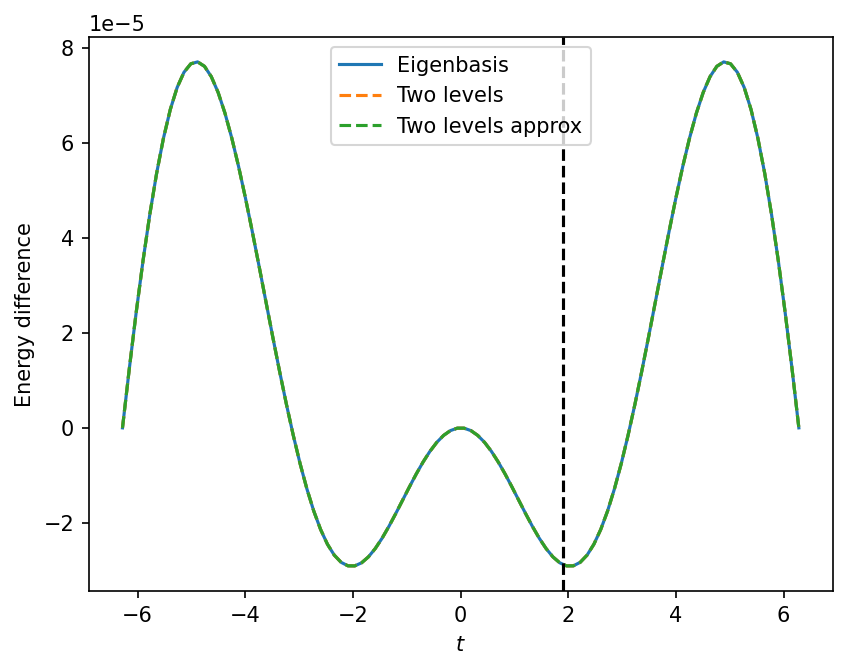

In [13]:
nqubits = 6
H = randomHamiltonian(nqubits, alpha = 1)
eigenvalues, eigenvectors = np.linalg.eigh(H)
E0 = eigenvalues[0]
if E0 < 0:
    H = H - eigenvalues[0]*np.eye(2**nqubits)
else :
    H = H + eigenvalues[0]*np.eye(2**nqubits)
eigenvalues, eigenvectors = np.linalg.eigh(H)
eps = 0.50
initState = np.sqrt(eps)*eigenvectors[:,0] + np.sqrt(1-eps)*eigenvectors[:,1]
initState = initState/np.linalg.norm(initState)
coeff = decomposeInEigenBasis(eigenvectors, initState)
energy = np.real(initState.conj().T @ H @ initState)
t = np.linspace(-2*np.pi, (2*np.pi), 100)
energy_diff_ebasis = np.zeros(len(t))
two_levels = np.zeros(len(t))
two_levels_approx = np.zeros(len(t))
s = sOptTwoLevels(coeff, eigenvalues)
for i in range(len(t)):
    energy_diff_ebasis[i] = energyDiffEnergyBasis(coeff, eigenvalues, energy, t[i])
    two_levels[i] = twoLevels(coeff, eigenvalues, t[i])
    two_levels_approx[i] = twoLevelsApprox(coeff, eigenvalues, t[i])
plt.figure(dpi = 150)
plt.plot(t, energy_diff_ebasis, label = 'Eigenbasis')
plt.plot(t, two_levels, '--', label = 'Two levels')
plt.plot(t, two_levels_approx, '--', label = 'Two levels approx')
plt.ylabel(r'Energy difference')
plt.axvline(x = s, color = 'black', linestyle = '--')
plt.legend()
plt.xlabel(r'$t$')


In [4]:
def estimateOneLevel(E, coeffs, t):
    val = 0
    absCoeffs = np.abs(coeffs)**2
    for i in range(1,len(coeffs)):
        val += 2*absCoeffs[i] *absCoeffs[0] * E[i]* (absCoeffs[0]*(1-np.cos(t))+np.cos(t*(E[i]+1))-np.cos(t*E[i]))
    return val


[Qibo 0.2.16|WARNING|2025-03-17 13:48:58]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.


0.25386607301735703
0.14597863604172515
0.1515389947352393
(0.14739823384833248+0j)


Text(0.5, 0, '$t$')

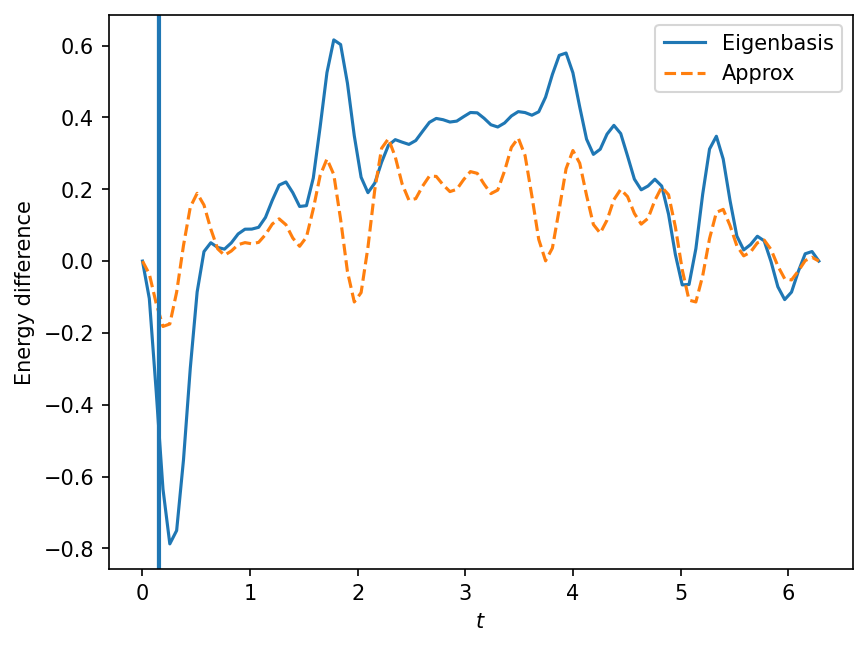

In [63]:
nqubits = 6
np.random.seed()
a = 10
H_def = sum([-Z(x)*Z(x+1)+X(x)*X(x+1)+Y(x)*Y(x+1)  for x in range(nqubits-1)])
H_def = sum([Z(x)*Z(x+1)+X(x)  for x in range(nqubits-1)])
H = hamiltonians.SymbolicHamiltonian(H_def).matrix
#H = randomHamiltonian(nqubits, alpha = a)
eigenvalues, eigenvectors = np.linalg.eigh(H)
E0 = eigenvalues[0]
if E0 < 0:
    H = H - eigenvalues[0]*np.eye(2**nqubits)
else :
    H = H + eigenvalues[0]*np.eye(2**nqubits)
eigenvalues, eigenvectors = np.linalg.eigh(H)
a0 = 0.1
a1 = 1/2**nqubits
eps = (1-a0-a1)

initState = np.sqrt(a0)*eigenvectors[:,0]
initState += np.sqrt(a1)*eigenvectors[:,1]
for i in range(1, 2**nqubits):
    initState += np.sqrt(eps/(2**nqubits-1))*eigenvectors[:,i]
initState = initState/np.linalg.norm(initState)
coeff = decomposeInEigenBasis(eigenvectors, initState)
energy = np.real(initState.conj().T @ H @ initState)
t = np.linspace(0, (2*np.pi), 100)
energy_diff_ebasis = np.zeros(len(t))
approx = np.zeros(len(t))
for i in range(len(t)):
    energy_diff_ebasis[i] = energyDiffEnergyBasis(coeff, eigenvalues, energy, t[i])
    approx[i] = estimateOneLevel(eigenvalues, coeff, t[i])
argmin = np.argmin(energy_diff_ebasis)
s = t[argmin]
E = max(eigenvalues)
#E = eigenvalues[1]
sTest = np.sqrt(6*(2*E+2-coeff[0]**2)/(3*E**3+5*E**2+4*E+2+coeff[0]**2))
print(s)
s2 = 4/np.sqrt(4*E**2+4*E+2)
s3 = (E**2+E-energy)/(2*E*(2*E**2+2*E-energy*E+1))
s3 = np.sqrt(s3)
print(s2)
print(s3)
print(sTest)
plt.figure(dpi = 150)
plt.plot(t, energy_diff_ebasis, label = 'Eigenbasis')
plt.plot(t, approx, '--', label = 'Approx')
plt.ylabel(r'Energy difference')
plt.axvline(x = sTest)
plt.axvline(x = s2)
plt.axvline(x = s3)
plt.legend()
plt.xlabel(r'$t$')

Text(0.5, 0, '$t$')

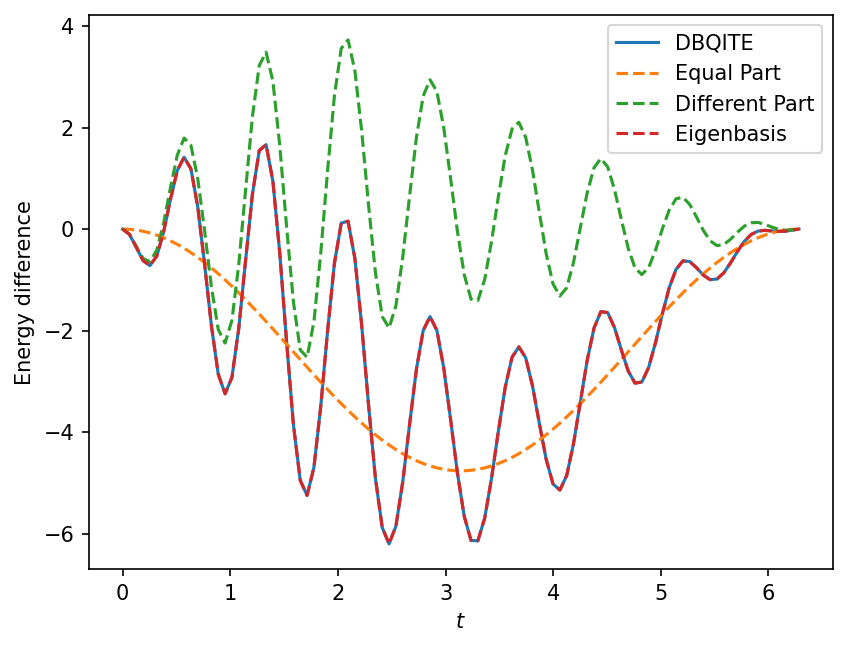

In [77]:
nqubits = 8
H = randomHamiltonian(nqubits, alpha = 10)
eigenvalues, eigenvectors = np.linalg.eigh(H)
initState = np.random.rand(2**nqubits) + 1j*np.random.rand(2**nqubits)
initState = initState/np.linalg.norm(initState)
coeff = decomposeInEigenBasis(eigenvectors, initState)
energy = np.real(initState.conj().T @ H @ initState)
t = np.linspace(0, (2*np.pi), 100)
energy_diff = np.zeros(len(t))
energy_diff_ebasis = np.zeros(len(t))
energy_diff_equal = np.zeros(len(t))
energy_diff_unequal = np.zeros(len(t))
for i in range(len(t)):
    energy_diff_ebasis[i] = energyDiffEnergyBasis(coeff, eigenvalues, energy, t[i])
    energy_diff_equal[i] = energyDiffEnergyBasisEqual(coeff, eigenvalues, energy, t[i])
    energy_diff_unequal[i] = energyDiffEnergyBasisUnequal(coeff, eigenvalues, energy, t[i])
    e0, e1 = energyDiff(initState, H, t[i])
    energy_diff[i] = e0+e1
plt.figure(dpi = 150)
plt.plot(t, energy_diff, label = 'DBQITE')
plt.plot(t, energy_diff_equal, '--', label = 'Equal Part')
plt.plot(t, energy_diff_unequal,'--', label = 'Different Part')
plt.plot(t, energy_diff_ebasis, '--', label = 'Eigenbasis')
#plt.plot(t, energy_diff_equal+energy_diff_unequal, '--', label = 'Sum')
plt.ylabel(r'Energy difference')
plt.legend()
plt.xlabel(r'$t$')


Text(0.5, 0, '$t$')

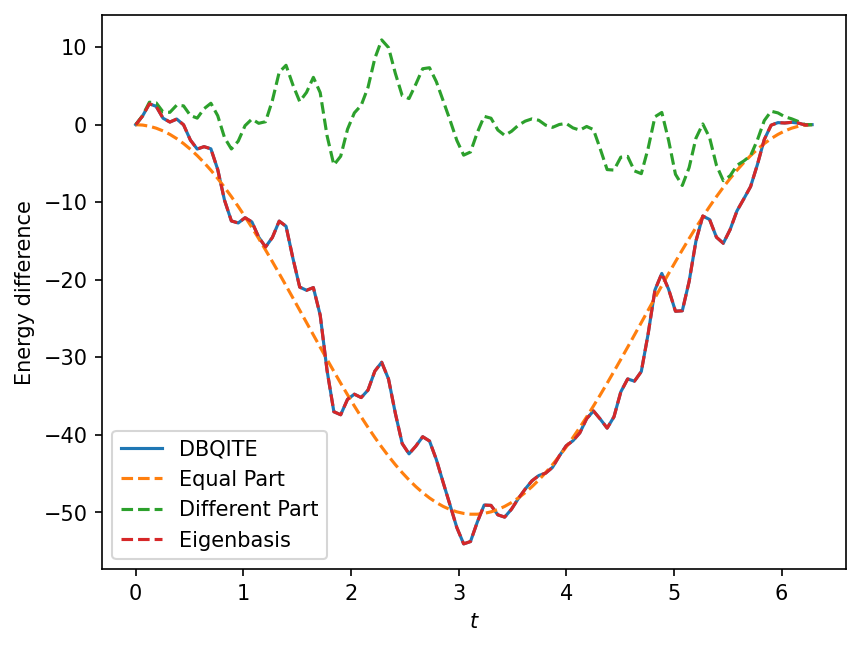

In [80]:
nqubits = 6
H = randomHamiltonian(nqubits, alpha = 100)
eigenvalues, eigenvectors = np.linalg.eigh(H)
initState = np.random.rand(2**nqubits) + 1j*np.random.rand(2**nqubits)
initState = initState/np.linalg.norm(initState)
coeff = decomposeInEigenBasis(eigenvectors, initState)
energy = np.real(initState.conj().T @ H @ initState)
t = np.linspace(0, (2*np.pi), 100)
energy_diff = np.zeros(len(t))
energy_diff_ebasis = np.zeros(len(t))
energy_diff_equal = np.zeros(len(t))
energy_diff_unequal = np.zeros(len(t))
for i in range(len(t)):
    energy_diff_ebasis[i] = energyDiffEnergyBasis(coeff, eigenvalues, energy, t[i])
    energy_diff_equal[i] = energyDiffEnergyBasisEqual(coeff, eigenvalues, energy, t[i])
    energy_diff_unequal[i] = energyDiffEnergyBasisUnequal(coeff, eigenvalues, energy, t[i])
    e0, e1 = energyDiff(initState, H, t[i])
    energy_diff[i] = e0+e1
plt.figure(dpi = 150)
plt.plot(t, energy_diff, label = 'DBQITE')
plt.plot(t, energy_diff_equal, '--', label = 'Equal Part')
plt.plot(t, energy_diff_unequal,'--', label = 'Different Part')
plt.plot(t, energy_diff_ebasis, '--', label = 'Eigenbasis')
#plt.plot(t, energy_diff_equal+energy_diff_unequal, '--', label = 'Sum')
plt.ylabel(r'Energy difference')
plt.legend()
plt.xlabel(r'$t$')


Text(0.5, 0, '$t$')

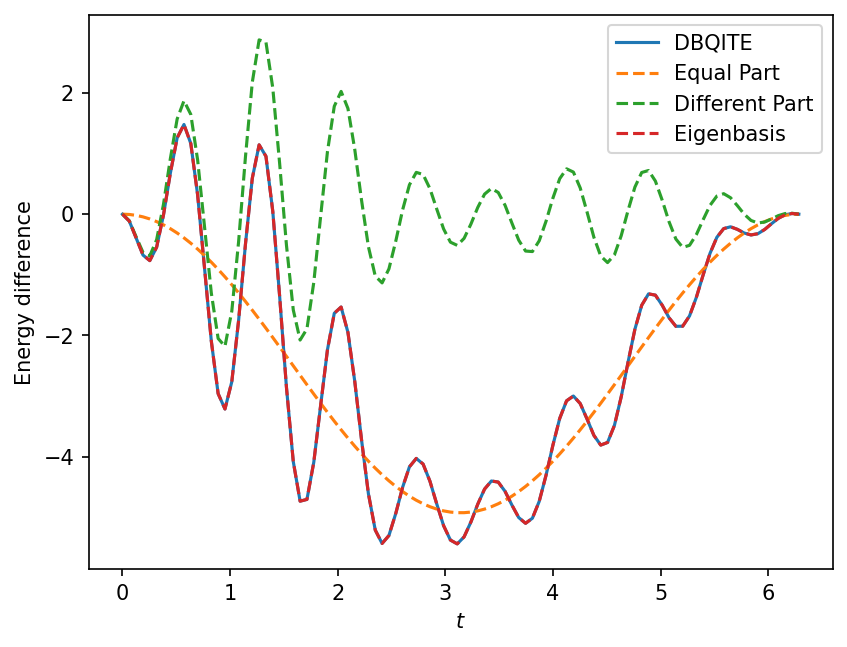

In [79]:
nqubits = 6
H = randomHamiltonian(nqubits, alpha = 10)
eigenvalues, eigenvectors = np.linalg.eigh(H)
initState = np.random.rand(2**nqubits) + 1j*np.random.rand(2**nqubits)
initState = initState/np.linalg.norm(initState)
coeff = decomposeInEigenBasis(eigenvectors, initState)
energy = np.real(initState.conj().T @ H @ initState)
t = np.linspace(0, (2*np.pi), 100)
energy_diff = np.zeros(len(t))
energy_diff_ebasis = np.zeros(len(t))
energy_diff_equal = np.zeros(len(t))
energy_diff_unequal = np.zeros(len(t))
for i in range(len(t)):
    energy_diff_ebasis[i] = energyDiffEnergyBasis(coeff, eigenvalues, energy, t[i])
    energy_diff_equal[i] = energyDiffEnergyBasisEqual(coeff, eigenvalues, energy, t[i])
    energy_diff_unequal[i] = energyDiffEnergyBasisUnequal(coeff, eigenvalues, energy, t[i])
    e0, e1 = energyDiff(initState, H, t[i])
    energy_diff[i] = e0+e1
plt.figure(dpi = 150)
plt.plot(t, energy_diff, label = 'DBQITE')
plt.plot(t, energy_diff_equal, '--', label = 'Equal Part')
plt.plot(t, energy_diff_unequal,'--', label = 'Different Part')
plt.plot(t, energy_diff_ebasis, '--', label = 'Eigenbasis')
#plt.plot(t, energy_diff_equal+energy_diff_unequal, '--', label = 'Sum')
plt.ylabel(r'Energy difference')
plt.legend()
plt.xlabel(r'$t$')


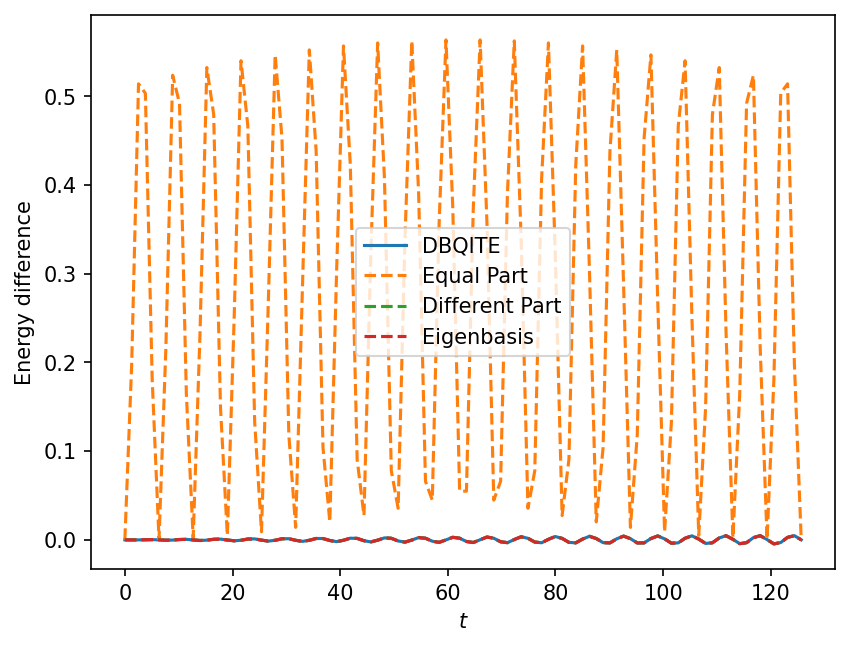

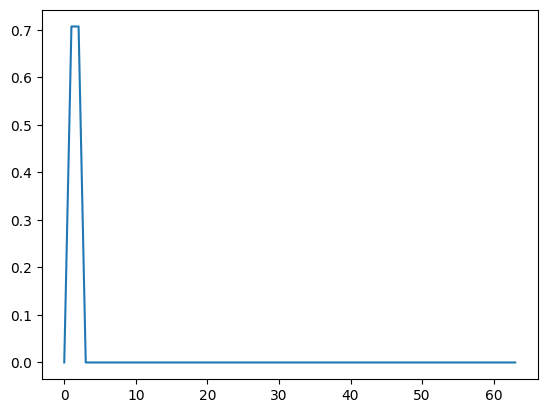

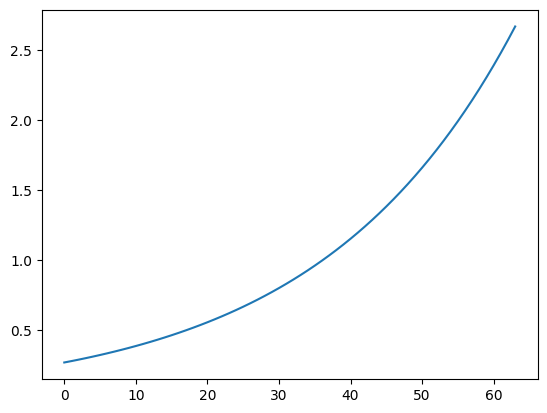

In [102]:
nqubits = 6
np.random.seed()
eigenvalues = np.logspace(0, 1, 2**nqubits)
# for i in range(2**(nqubits-1), 2**nqubits):
#     eigenvalues[i] = 1
H = randomHamiltonian2(nqubits, eigenvalues, alpha = 10)
eigenvalues, eigenvectors = np.linalg.eigh(H)
initState = np.random.rand(2**nqubits) + 1j*np.random.rand(2**nqubits)
initState = initState/np.linalg.norm(initState)
initState = np.zeros(2**nqubits, dtype = complex)    
for i in range(1,3):
    initState += eigenvectors[:,i]
initState = initState/np.linalg.norm(initState)
coeff = decomposeInEigenBasis(eigenvectors, initState)
energy = np.real(initState.conj().T @ H @ initState)
t = np.linspace(0, (2*np.pi)*20, 100)
energy_diff = np.zeros(len(t))
energy_diff_ebasis = np.zeros(len(t))
energy_diff_equal = np.zeros(len(t))
energy_diff_unequal = np.zeros(len(t))
for i in range(len(t)):
    energy_diff_ebasis[i] = energyDiffEnergyBasis(coeff, eigenvalues, energy, t[i])
    energy_diff_equal[i] = energyDiffEnergyBasisEqual(coeff, eigenvalues, energy, t[i])
    energy_diff_unequal[i] = energyDiffEnergyBasisUnequal(coeff, eigenvalues, energy, t[i])
    e0, e1 = energyDiff(initState, H, t[i])
    energy_diff[i] = e0+e1
plt.figure(dpi = 150)
plt.plot(t, energy_diff, label = 'DBQITE')
plt.plot(t, energy_diff_equal, '--', label = 'Equal Part')
plt.plot(t, energy_diff_unequal,'--', label = 'Different Part')
plt.plot(t, energy_diff_ebasis, '--', label = 'Eigenbasis')
#plt.plot(t, energy_diff_equal+energy_diff_unequal, '--', label = 'Sum')
plt.ylabel(r'Energy difference')
plt.legend()
plt.xlabel(r'$t$')


plt.figure()
plt.plot(coeff)

plt.figure()
plt.plot(eigenvalues)

[Qibo 0.2.16|WARNING|2025-03-12 13:36:06]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.


Text(0.5, 0, '$t$')

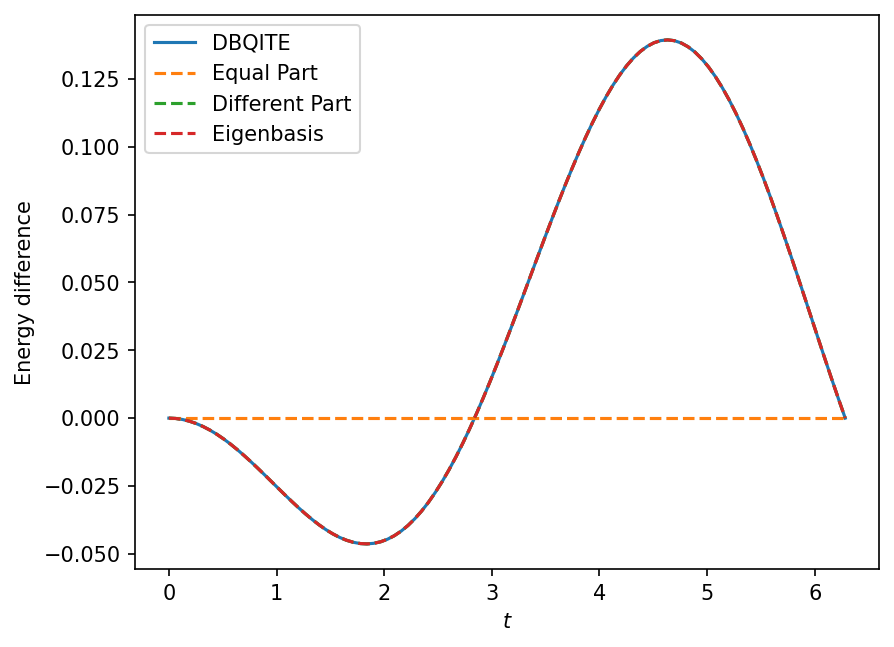

In [ ]:
nqubits = 3
H_def = sum([X(x)*X(x+1)+Y(x)*Y(x+1)-Z(x)*Z(x+1)  for x in range(nqubits-1)])
H = hamiltonians.SymbolicHamiltonian(H_def).matrix
H = np.kron(H,np.eye(2**nqubits))
H *= 1/np.linalg.norm(H)
#H = randomHamiltonian(2*nqubits, alpha = 10)
eigenvalues, eigenvectors = np.linalg.eigh(H)
initState = np.random.rand(2**(2*nqubits)) + 1j*np.random.rand(2**(2*nqubits))
#initState = initState/np.linalg.norm(initState)
#initState = maxEntangledState(nqubits)
# initState = np.zeros(2**(2*nqubits), dtype = complex)    
# for i in range(len(eigenvalues)):
#     initState += eigenvectors[:,i]
initState = initState/np.linalg.norm(initState)
coeff = decomposeInEigenBasis(eigenvectors, initState)
energy = np.real(initState.conj().T @ H @ initState)
t = np.linspace(0, (2*np.pi), 100)
energy_diff = np.zeros(len(t))
energy_diff_ebasis = np.zeros(len(t))
energy_diff_equal = np.zeros(len(t))
energy_diff_unequal = np.zeros(len(t))
for i in range(len(t)):
    energy_diff_ebasis[i] = energyDiffEnergyBasis(coeff, eigenvalues, energy, t[i])
    energy_diff_equal[i] = energyDiffEnergyBasisEqual(coeff, eigenvalues, energy, t[i])
    energy_diff_unequal[i] = energyDiffEnergyBasisUnequal(coeff, eigenvalues, energy, t[i])
    e0, e1 = energyDiff(initState, H, t[i])
    energy_diff[i] = e0+e1
plt.figure(dpi = 150)
plt.plot(t, energy_diff, label = 'DBQITE')
plt.plot(t, energy_diff_equal, '--', label = 'Equal Part')
plt.plot(t, energy_diff_unequal,'--', label = 'Different Part')
plt.plot(t, energy_diff_ebasis, '--', label = 'Eigenbasis')
#plt.plot(t, energy_diff_equal+energy_diff_unequal, '--', label = 'Sum')
plt.ylabel(r'Energy difference')
plt.legend()
plt.xlabel(r'$t$')

[Qibo 0.2.16|WARNING|2025-03-12 15:14:24]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.


Text(0.5, 0, '$t$')

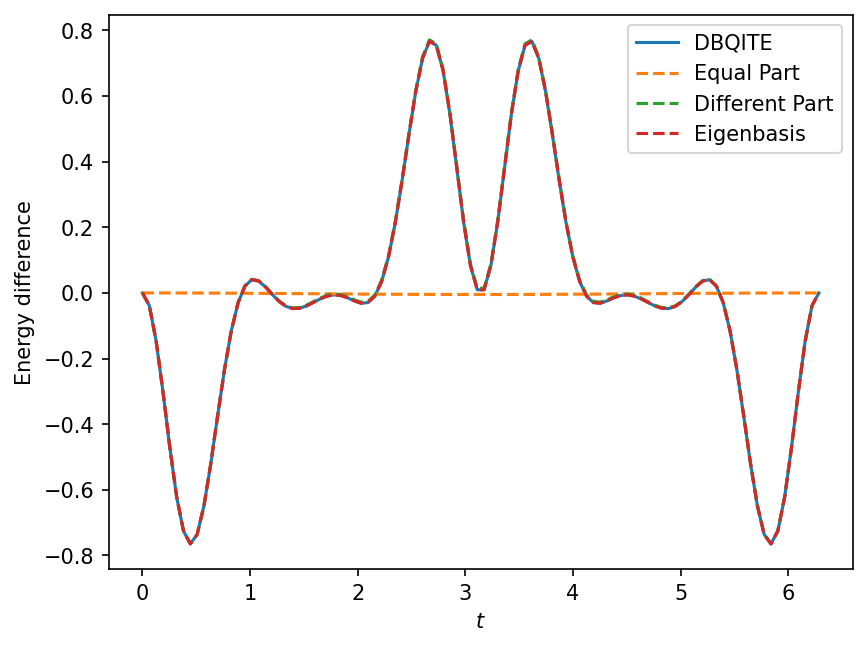

In [9]:
nqubits = 6
H_def = sum([Z(x)*Z(x+1)  for x in range(nqubits-1)])
H = hamiltonians.SymbolicHamiltonian(H_def).matrix
#H *= 10/np.linalg.norm(H)
#H = randomHamiltonian(2*nqubits, alpha = 10)
eigenvalues, eigenvectors = np.linalg.eigh(H)
initState = np.random.rand(2**(nqubits)) + 1j*np.random.rand(2**(nqubits))
initState = initState/np.linalg.norm(initState)
#initState = maxEntangledState(3)
# initState = np.zeros(2**(nqubits), dtype = complex)    
# for i in range(len(eigenvalues)):
#     initState += eigenvectors[:,i]
initState = initState/np.linalg.norm(initState)
coeff = decomposeInEigenBasis(eigenvectors, initState)
energy = np.real(initState.conj().T @ H @ initState)
t = np.linspace(0, (2*np.pi), 100)
energy_diff = np.zeros(len(t))
energy_diff_ebasis = np.zeros(len(t))
energy_diff_equal = np.zeros(len(t))
energy_diff_unequal = np.zeros(len(t))
for i in range(len(t)):
    energy_diff_ebasis[i] = energyDiffEnergyBasis(coeff, eigenvalues, energy, t[i])
    energy_diff_equal[i] = energyDiffEnergyBasisEqual(coeff, eigenvalues, energy, t[i])
    energy_diff_unequal[i] = energyDiffEnergyBasisUnequal(coeff, eigenvalues, energy, t[i])
    e0, e1 = energyDiff(initState, H, t[i])
    energy_diff[i] = e0+e1
plt.figure(dpi = 150)
plt.plot(t, energy_diff, label = 'DBQITE')
plt.plot(t, energy_diff_equal, '--', label = 'Equal Part')
plt.plot(t, energy_diff_unequal,'--', label = 'Different Part')
plt.plot(t, energy_diff_ebasis, '--', label = 'Eigenbasis')
#plt.plot(t, energy_diff_equal+energy_diff_unequal, '--', label = 'Sum')
plt.ylabel(r'Energy difference')
plt.legend()
plt.xlabel(r'$t$')

[Qibo 0.2.16|WARNING|2025-03-12 13:51:37]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.
[Qibo 0.2.16|WARNING|2025-03-12 13:54:22]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.


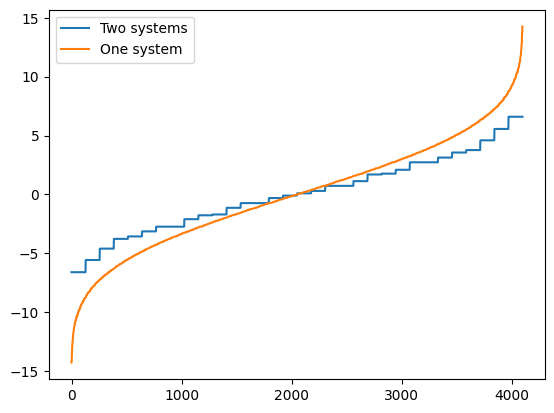

In [ ]:
nqubits = 12
H_def = sum([X(x)+Z(x)*Z(x+1)  for x in range(nqubits-1)])
H = hamiltonians.SymbolicHamiltonian(H_def).matrix
eigenvalues, eigenvectors = np.linalg.eigh(H)

nqubits = 6
H_def = sum([X(x)+Z(x)*Z(x+1)  for x in range(nqubits-1)])
H = hamiltonians.SymbolicHamiltonian(H_def).matrix
H = np.kron(H,np.eye(2**nqubits))
eigenvalues_deg, eigenvectors = np.linalg.eigh(H)

plt.figure()
plt.plot(eigenvalues_deg, label = 'Two systems')   
plt.plot(eigenvalues, label = 'One system')
plt.legend()
plt.show()



[Qibo 0.2.16|WARNING|2025-03-12 15:13:53]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.
[Qibo 0.2.16|WARNING|2025-03-12 15:13:55]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.


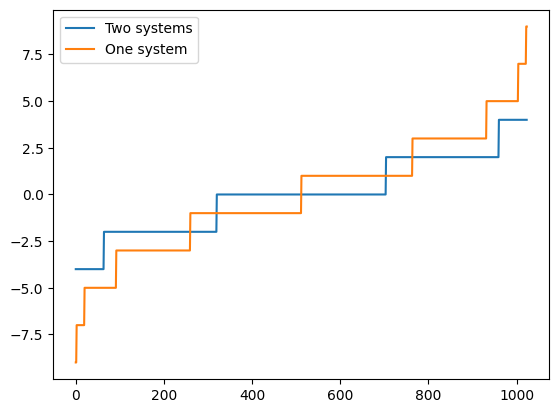

In [8]:
nqubits = 10
# H_def = sum([X(x)*X(x+1)+Y(x)*Y(x+1) for x in range(nqubits-1)])
H_def = sum([Z(x)*Z(x+1)  for x in range(nqubits-1)])
H = hamiltonians.SymbolicHamiltonian(H_def).matrix
eigenvalues, eigenvectors = np.linalg.eigh(H)

nqubits = 5
# H_def = sum([X(x)*X(x+1)+Y(x)*Y(x+1) for x in range(nqubits-1)])
H_def = sum([Z(x)*Z(x+1)  for x in range(nqubits-1)])
H = hamiltonians.SymbolicHamiltonian(H_def).matrix
H = np.kron(H,np.eye(2**nqubits))
eigenvalues_deg, eigenvectors = np.linalg.eigh(H)

plt.figure()
plt.plot(eigenvalues_deg, label = 'Two systems')   
plt.plot(eigenvalues, label = 'One system')
plt.legend()
plt.show()

